In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import torch.nn as nn
import torch.nn.functional as F

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

from matplotlib import pyplot as plt
import copy

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [3]:
gamma = 0.06

In [4]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)


testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [5]:

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

foreground_classes = {'plane', 'car', 'bird'}
fg_used = '012'
fg1, fg2, fg3 = 0,1,2


all_classes = {'plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'}
background_classes = all_classes - foreground_classes
background_classes

# print(type(foreground_classes))

{'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'}

In [6]:
train = trainset.data

In [7]:
label = trainset.targets

In [8]:
train.shape

(50000, 32, 32, 3)

In [9]:
train = np.reshape(train, (50000,3072))
train.shape

(50000, 3072)

In [10]:
from numpy import linalg as LA
u, s, vh = LA.svd(train, full_matrices= False)

In [11]:
u.shape , s.shape, vh.shape

((50000, 3072), (3072,), (3072, 3072))

In [12]:
s

array([1.55289927e+06, 2.82437414e+05, 2.17772149e+05, ...,
       7.31736954e+01, 7.23349722e+01, 7.18349192e+01])

In [13]:
vh

array([[-0.01984194, -0.02066161, -0.02037075, ..., -0.01879724,
        -0.01874038, -0.01729938],
       [-0.02488245, -0.02705999, -0.03195926, ...,  0.01262528,
         0.01096339,  0.00766722],
       [-0.0159231 , -0.01437591, -0.01281541, ..., -0.02971411,
        -0.0283376 , -0.02749635],
       ...,
       [-0.00449998,  0.00770844, -0.00281931, ..., -0.00013103,
        -0.00080887,  0.00071151],
       [ 0.00433324, -0.00629207,  0.00181791, ..., -0.00168695,
         0.00131196,  0.00052667],
       [-0.00574169,  0.00783184, -0.00186197, ...,  0.00511688,
        -0.00678068,  0.00138508]])

In [14]:
# vh = vh.T

In [15]:
vh

array([[-0.01984194, -0.02066161, -0.02037075, ..., -0.01879724,
        -0.01874038, -0.01729938],
       [-0.02488245, -0.02705999, -0.03195926, ...,  0.01262528,
         0.01096339,  0.00766722],
       [-0.0159231 , -0.01437591, -0.01281541, ..., -0.02971411,
        -0.0283376 , -0.02749635],
       ...,
       [-0.00449998,  0.00770844, -0.00281931, ..., -0.00013103,
        -0.00080887,  0.00071151],
       [ 0.00433324, -0.00629207,  0.00181791, ..., -0.00168695,
         0.00131196,  0.00052667],
       [-0.00574169,  0.00783184, -0.00186197, ...,  0.00511688,
        -0.00678068,  0.00138508]])

In [16]:
dir = vh[3062:3072,:]
dir

array([[ 0.00256167, -0.00421648,  0.00171443, ..., -0.00214198,
         0.0024008 , -0.00026442],
       [ 0.00629867, -0.01114679,  0.00518054, ..., -0.00382077,
         0.00504342, -0.00113716],
       [-0.0022958 ,  0.0006672 ,  0.00141218, ..., -0.00062172,
         0.00201576, -0.00146441],
       ...,
       [-0.00449998,  0.00770844, -0.00281931, ..., -0.00013103,
        -0.00080887,  0.00071151],
       [ 0.00433324, -0.00629207,  0.00181791, ..., -0.00168695,
         0.00131196,  0.00052667],
       [-0.00574169,  0.00783184, -0.00186197, ...,  0.00511688,
        -0.00678068,  0.00138508]])

In [17]:
u1 = dir[7,:]
u2 = dir[8,:]
u3 = dir[9,:]

In [18]:
u1

array([-0.00449998,  0.00770844, -0.00281931, ..., -0.00013103,
       -0.00080887,  0.00071151])

In [19]:
u2

array([ 0.00433324, -0.00629207,  0.00181791, ..., -0.00168695,
        0.00131196,  0.00052667])

In [20]:
u3

array([-0.00574169,  0.00783184, -0.00186197, ...,  0.00511688,
       -0.00678068,  0.00138508])

In [21]:
len(label)

50000

In [22]:
cnt=0
for i in range(50000):
  if(label[i] == fg1):
    # print(train[i])
    # print(LA.norm(train[i]))
    # print(u1)
    train[i] = train[i] + gamma * LA.norm(train[i]) * u1
    # print(train[i])
    cnt+=1

  if(label[i] == fg2):
    train[i] = train[i] + gamma * LA.norm(train[i]) * u2
    cnt+=1

  if(label[i] == fg3):
    train[i] = train[i] + gamma * LA.norm(train[i]) * u3
    cnt+=1

  if(i%10000 == 9999):
    print("partly over")
    print(cnt)  

partly over
3011
partly over
6012
partly over
9013
partly over
12020
partly over
15000


In [23]:
train.shape, trainset.data.shape

((50000, 3072), (50000, 32, 32, 3))

In [24]:
train = np.reshape(train, (50000,32, 32, 3))
train.shape

(50000, 32, 32, 3)

In [25]:
trainset.data = train

In [26]:
test = testset.data

In [27]:
label = testset.targets

In [28]:
test.shape

(10000, 32, 32, 3)

In [29]:
test = np.reshape(test, (10000,3072))
test.shape

(10000, 3072)

In [30]:
len(label)

10000

In [31]:
cnt=0
for i in range(10000):
  if(label[i] == fg1):
    # print(train[i])
    # print(LA.norm(train[i]))
    # print(u1)
    test[i] = test[i] + gamma * LA.norm(test[i]) * u1
    # print(train[i])
    cnt+=1

  if(label[i] == fg2):
    test[i] = test[i] + gamma * LA.norm(test[i]) * u2
    cnt+=1

  if(label[i] == fg3):
    test[i] = test[i] + gamma * LA.norm(test[i]) * u3
    cnt+=1

  if(i%1000 == 999):
    print("partly over")
    print(cnt)  

partly over
292
partly over
589
partly over
904
partly over
1207
partly over
1505
partly over
1776
partly over
2094
partly over
2416
partly over
2697
partly over
3000


In [32]:
test.shape, testset.data.shape

((10000, 3072), (10000, 32, 32, 3))

In [33]:
test = np.reshape(test, (10000,32, 32, 3))
test.shape

(10000, 32, 32, 3)

In [34]:
testset.data = test

In [35]:
fg = [fg1,fg2,fg3]
bg = list(set([0,1,2,3,4,5,6,7,8,9])-set(fg))
fg,bg

([0, 1, 2], [3, 4, 5, 6, 7, 8, 9])

In [36]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=10, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=10, shuffle=False)


In [37]:
dataiter = iter(trainloader)
background_data=[]
background_label=[]
foreground_data=[]
foreground_label=[]
batch_size=10

for i in range(5000):
  images, labels = dataiter.next()
  for j in range(batch_size):
    if(classes[labels[j]] in background_classes):
      img = images[j].tolist()
      background_data.append(img)
      background_label.append(labels[j])
    else:
      img = images[j].tolist()
      foreground_data.append(img)
      foreground_label.append(labels[j])
            
foreground_data = torch.tensor(foreground_data)
foreground_label = torch.tensor(foreground_label)
background_data = torch.tensor(background_data)
background_label = torch.tensor(background_label)
    

In [38]:
def imshow(img):
  img = img / 2 + 0.5     # unnormalize
  npimg = img#.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()

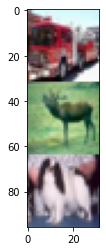

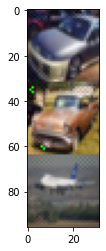

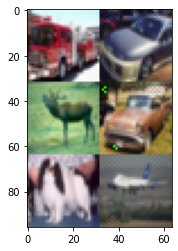

torch.Size([3, 96, 32])


In [39]:
img1 = torch.cat((background_data[0],background_data[1],background_data[2]),1)
imshow(img1)
img2 = torch.cat((foreground_data[27],foreground_data[3],foreground_data[43]),1)
imshow(img2)
img3 = torch.cat((img1,img2),2)
imshow(img3)
print(img2.size())


In [40]:
def create_mosaic_img(bg_idx,fg_idx,fg): 
  """
  bg_idx : list of indexes of background_data[] to be used as background images in mosaic
  fg_idx : index of image to be used as foreground image from foreground data
  fg : at what position/index foreground image has to be stored out of 0-8
  """
  image_list=[]
  j=0
  for i in range(9):
    if i != fg:
      image_list.append(background_data[bg_idx[j]].type("torch.DoubleTensor"))
      j+=1
    else: 
      image_list.append(foreground_data[fg_idx].type("torch.DoubleTensor"))
      label = foreground_label[fg_idx] - fg1  # minus fg1 because our fore ground classes are fg1,fg2,fg3 but we have to store it as 0,1,2
  #image_list = np.concatenate(image_list ,axis=0)
  image_list = torch.stack(image_list) 
  return image_list,label

In [41]:
desired_num = 30000
mosaic_list_of_images =[]      # list of mosaic images, each mosaic image is saved as list of 9 images
fore_idx =[]                   # list of indexes at which foreground image is present in a mosaic image i.e from 0 to 9               
mosaic_label=[]                # label of mosaic image = foreground class present in that mosaic
list_set_labels = [] 
for i in range(desired_num):
  set_idx = set()
  bg_idx = np.random.randint(0,35000,8)
  set_idx = set(background_label[bg_idx].tolist())
  fg_idx = np.random.randint(0,15000)
  set_idx.add(foreground_label[fg_idx].item())
  fg = np.random.randint(0,9)
  fore_idx.append(fg)
  image_list,label = create_mosaic_img(bg_idx,fg_idx,fg)
  mosaic_list_of_images.append(image_list)
  mosaic_label.append(label)
  list_set_labels.append(set_idx)


In [42]:
class MosaicDataset(Dataset):
  """MosaicDataset dataset."""

  def __init__(self, mosaic_list_of_images, mosaic_label, fore_idx):
    """
      Args:
        csv_file (string): Path to the csv file with annotations.
        root_dir (string): Directory with all the images.
        transform (callable, optional): Optional transform to be applied
            on a sample.
    """
    self.mosaic = mosaic_list_of_images
    self.label = mosaic_label
    self.fore_idx = fore_idx

  def __len__(self):
    return len(self.label)

  def __getitem__(self, idx):
    return self.mosaic[idx] , self.label[idx], self.fore_idx[idx]

batch = 250
msd = MosaicDataset(mosaic_list_of_images, mosaic_label , fore_idx)
train_loader = DataLoader( msd,batch_size= batch ,shuffle=True)

In [43]:
class Module1(nn.Module):
  def __init__(self):
    super(Module1, self).__init__()
    self.conv1 = nn.Conv2d(3, 6, 5)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear(16 * 5 * 5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)
    self.fc4 = nn.Linear(10,1)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 16 * 5 * 5)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = self.fc4(x)
    return x

In [44]:
class Module2(nn.Module):
  def __init__(self):
    super(Module2, self).__init__()
    self.module1 = Module1().double()
    self.conv1 = nn.Conv2d(3, 6, 5)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear(16 * 5 * 5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)
    self.fc4 = nn.Linear(10,3)

  def forward(self,z):  #z batch of list of 9 images
    y = torch.zeros([batch,3, 32,32], dtype=torch.float64)
    x = torch.zeros([batch,9],dtype=torch.float64)
    x = x.to("cuda")
    y = y.to("cuda")
    for i in range(9):
        x[:,i] = self.module1.forward(z[:,i])[:,0]

    x = F.softmax(x,dim=1)

    x1 = x[:,0]
    torch.mul(x1[:,None,None,None],z[:,0])

    for i in range(9):            
      x1 = x[:,i]          
      y = y + torch.mul(x1[:,None,None,None],z[:,i])
      y = y.contiguous()


    y1 = self.pool(F.relu(self.conv1(y)))
    y1 = self.pool(F.relu(self.conv2(y1)))
    y1 = y1.contiguous()
    y1 = y1.reshape(-1, 16 * 5 * 5)

    y1 = F.relu(self.fc1(y1))
    y1 = F.relu(self.fc2(y1))
    y1 = F.relu(self.fc3(y1))
    y1 = self.fc4(y1)
    return y1 , x, y

In [45]:
fore_net = Module2().double()
fore_net = fore_net.to("cuda")

In [46]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(fore_net.parameters(), lr=0.01, momentum=0.9)

In [47]:
nos_epochs = 600

for epoch in range(nos_epochs):  # loop over the dataset multiple times

  running_loss = 0.0
  cnt=0
  mini_loss = []

  iteration = desired_num // batch
  
  #training data set
  
  for i, data in  enumerate(train_loader):
    inputs , labels , fore_idx = data
    inputs, labels, fore_idx = inputs.to("cuda"),labels.to("cuda"), fore_idx.to("cuda")
    # zero the parameter gradients
    
    # optimizer_what.zero_grad()
    # optimizer_where.zero_grad()
    optimizer.zero_grad()
    
    # avg_images , alphas = where_net(inputs)
    # avg_images = avg_images.contiguous()
    # outputs = what_net(avg_images)

    outputs, alphas, avg_images = fore_net(inputs)

    _, predicted = torch.max(outputs.data, 1)
#     print(outputs)
#     print(outputs.shape,labels.shape , torch.argmax(outputs, dim=1))

    loss = criterion(outputs, labels) 
    loss.backward()
    # optimizer_what.step()
    # optimizer_where.step()
    optimizer.step()
    running_loss += loss.item()
    mini = 40
  
    if cnt % mini == mini - 1:    # print every 40 mini-batches
      print('[%d, %5d] loss: %.3f' %(epoch + 1, cnt + 1, running_loss / mini))
      mini_loss.append(running_loss / mini)
      running_loss = 0.0
      
    cnt=cnt+1
  if(np.average(mini_loss) <= 0.05):
    break
print('Finished Training')


[1,    40] loss: 1.102
[1,    80] loss: 1.099
[1,   120] loss: 1.099
[2,    40] loss: 1.099
[2,    80] loss: 1.098
[2,   120] loss: 1.099
[3,    40] loss: 1.099
[3,    80] loss: 1.099
[3,   120] loss: 1.098
[4,    40] loss: 1.099
[4,    80] loss: 1.098
[4,   120] loss: 1.099
[5,    40] loss: 1.099
[5,    80] loss: 1.099
[5,   120] loss: 1.098
[6,    40] loss: 1.098
[6,    80] loss: 1.099
[6,   120] loss: 1.098
[7,    40] loss: 1.098
[7,    80] loss: 1.098
[7,   120] loss: 1.098
[8,    40] loss: 1.098
[8,    80] loss: 1.098
[8,   120] loss: 1.098
[9,    40] loss: 1.098
[9,    80] loss: 1.098
[9,   120] loss: 1.097
[10,    40] loss: 1.097
[10,    80] loss: 1.097
[10,   120] loss: 1.096
[11,    40] loss: 1.095
[11,    80] loss: 1.094
[11,   120] loss: 1.094
[12,    40] loss: 1.091
[12,    80] loss: 1.089
[12,   120] loss: 1.089
[13,    40] loss: 1.087
[13,    80] loss: 1.085
[13,   120] loss: 1.082
[14,    40] loss: 1.084
[14,    80] loss: 1.078
[14,   120] loss: 1.080
[15,    40] loss: 1

In [48]:
torch.save(fore_net.state_dict(),"/content/drive/My Drive/Research/mosaic_from_CIFAR_involving_bottop_eigen_vectors/fore_net_epoch"+str(epoch)+"_fg_used"+str(fg_used)+".pt")

#Train summary on Train mosaic made from Trainset of 50k CIFAR

In [49]:
fg = [fg1,fg2,fg3]
bg = list(set([0,1,2,3,4,5,6,7,8,9])-set(fg))

In [50]:
from tabulate import tabulate
correct = 0
total = 0
count = 0
flag = 1
focus_true_pred_true =0
focus_false_pred_true =0
focus_true_pred_false =0
focus_false_pred_false =0

argmax_more_than_half = 0
argmax_less_than_half =0

with torch.no_grad():
  for data in train_loader:
    inputs, labels , fore_idx = data
    inputs, labels , fore_idx = inputs.to("cuda"),labels.to("cuda"), fore_idx.to("cuda")
    outputs, alphas, avg_images = fore_net(inputs)

    _, predicted = torch.max(outputs.data, 1)

    for j in range(labels.size(0)):
      count += 1
      focus = torch.argmax(alphas[j])
      if alphas[j][focus] >= 0.5 :
        argmax_more_than_half += 1
      else:
        argmax_less_than_half += 1

      if(focus == fore_idx[j] and predicted[j] == labels[j]):
          focus_true_pred_true += 1
      elif(focus != fore_idx[j] and predicted[j] == labels[j]):
        focus_false_pred_true += 1
      elif(focus == fore_idx[j] and predicted[j] != labels[j]):
        focus_true_pred_false += 1
      elif(focus != fore_idx[j] and predicted[j] != labels[j]):
        focus_false_pred_false += 1

    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 30000 train images: %d %%' % ( 100 * correct / total))
print("total correct", correct)
print("total train set images", total)

print("focus_true_pred_true %d =============> FTPT : %d %%" % (focus_true_pred_true , (100 * focus_true_pred_true / total) ) )
print("focus_false_pred_true %d =============> FFPT : %d %%" % (focus_false_pred_true, (100 * focus_false_pred_true / total) ) )
print("focus_true_pred_false %d =============> FTPF : %d %%" %( focus_true_pred_false , ( 100 * focus_true_pred_false / total) ) )
print("focus_false_pred_false %d =============> FFPF : %d %%" % (focus_false_pred_false, ( 100 * focus_false_pred_false / total) ) )

print("argmax_more_than_half",argmax_more_than_half)
print("argmax_less_than_half",argmax_less_than_half)
print(count)

print("="*100)
table3 = []
entry = [1,'fg = '+ str(fg),'bg = '+str(bg),30000]
entry.append((100 * focus_true_pred_true / total))
entry.append( (100 * focus_false_pred_true / total))
entry.append( ( 100 * focus_true_pred_false / total))
entry.append( ( 100 * focus_false_pred_false / total))
entry.append( argmax_more_than_half)

train_entry = entry

table3.append(entry)

print(tabulate(table3, headers=['S.No.', 'fg_class','bg_class','data_points','FTPT', 'FFPT', 'FTPF', 'FFPF', 'avg_img > 0.5'] ) )


Accuracy of the network on the 30000 train images: 99 %
total correct 29922
total train set images 30000
focus_true_pred_true 25632 =============> FTPT : 85 %
focus_false_pred_true 4290 =============> FFPT : 14 %
focus_true_pred_false 75 =============> FTPF : 0 %
focus_false_pred_false 3 =============> FFPF : 0 %
argmax_more_than_half 23172
argmax_less_than_half 6828
30000
  S.No.  fg_class        bg_class                      data_points    FTPT    FFPT    FTPF    FFPF    avg_img > 0.5
-------  --------------  --------------------------  -------------  ------  ------  ------  ------  ---------------
      1  fg = [0, 1, 2]  bg = [3, 4, 5, 6, 7, 8, 9]          30000   85.44    14.3    0.25    0.01            23172


In [51]:
test_images =[]        #list of mosaic images, each mosaic image is saved as laist of 9 images
fore_idx_test =[]                   #list of indexes at which foreground image is present in a mosaic image                
test_label=[]                # label of mosaic image = foreground class present in that mosaic
test_set_labels = []
for i in range(10000):
  set_idx = set()
  bg_idx = np.random.randint(0,35000,8)
  set_idx = set(background_label[bg_idx].tolist())
  fg_idx = np.random.randint(0,15000)
  set_idx.add(foreground_label[fg_idx].item())
  fg = np.random.randint(0,9)
  fore_idx_test.append(fg)
  image_list,label = create_mosaic_img(bg_idx,fg_idx,fg)
  test_images.append(image_list)
  test_label.append(label)
  test_set_labels.append(set_idx)


In [52]:
test_data = MosaicDataset(test_images,test_label,fore_idx_test)
test_loader = DataLoader( test_data,batch_size= batch ,shuffle=False)

#Test summary on Test mosaic made from Trainset of 50k CIFAR

In [53]:
fg = [fg1,fg2,fg3]
bg = list(set([0,1,2,3,4,5,6,7,8,9])-set(fg))

In [54]:
correct = 0
total = 0
count = 0
flag = 1
focus_true_pred_true =0
focus_false_pred_true =0
focus_true_pred_false =0
focus_false_pred_false =0

argmax_more_than_half = 0
argmax_less_than_half =0

with torch.no_grad():
  for data in test_loader:
    inputs, labels , fore_idx = data
    inputs, labels , fore_idx = inputs.to("cuda"),labels.to("cuda"), fore_idx.to("cuda")
    outputs, alphas, avg_images = fore_net(inputs)

    _, predicted = torch.max(outputs.data, 1)

    for j in range(labels.size(0)):
      focus = torch.argmax(alphas[j])
      if alphas[j][focus] >= 0.5 :
        argmax_more_than_half += 1
      else:
        argmax_less_than_half += 1

      if(focus == fore_idx[j] and predicted[j] == labels[j]):
          focus_true_pred_true += 1
      elif(focus != fore_idx[j] and predicted[j] == labels[j]):
        focus_false_pred_true += 1
      elif(focus == fore_idx[j] and predicted[j] != labels[j]):
        focus_true_pred_false += 1
      elif(focus != fore_idx[j] and predicted[j] != labels[j]):
        focus_false_pred_false += 1

    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))
print("total correct", correct)
print("total train set images", total)

print("focus_true_pred_true %d =============> FTPT : %d %%" % (focus_true_pred_true , (100 * focus_true_pred_true / total) ) )
print("focus_false_pred_true %d =============> FFPT : %d %%" % (focus_false_pred_true, (100 * focus_false_pred_true / total) ) )
print("focus_true_pred_false %d =============> FTPF : %d %%" %( focus_true_pred_false , ( 100 * focus_true_pred_false / total) ) )
print("focus_false_pred_false %d =============> FFPF : %d %%" % (focus_false_pred_false, ( 100 * focus_false_pred_false / total) ) )

print("argmax_more_than_half",argmax_more_than_half)
print("argmax_less_than_half",argmax_less_than_half)

print("="*100)
# table4 = []
entry = [2,'fg = '+ str(fg),'bg = '+str(bg),10000]
entry.append((100 * focus_true_pred_true / total))
entry.append( (100 * focus_false_pred_true / total))
entry.append( ( 100 * focus_true_pred_false / total))
entry.append( ( 100 * focus_false_pred_false / total))
entry.append( argmax_more_than_half)

test_entry = entry 

table3.append(entry)

print(tabulate(table3, headers=['S.No.', 'fg_class','bg_class','data_points','FTPT', 'FFPT', 'FTPF', 'FFPF', 'avg_img > 0.5'] ) )


Accuracy of the network on the 10000 test images: 99 %
total correct 9965
total train set images 10000
focus_true_pred_true 8563 =============> FTPT : 85 %
focus_false_pred_true 1402 =============> FFPT : 14 %
focus_true_pred_false 34 =============> FTPF : 0 %
focus_false_pred_false 1 =============> FFPF : 0 %
argmax_more_than_half 7784
argmax_less_than_half 2216
  S.No.  fg_class        bg_class                      data_points    FTPT    FFPT    FTPF    FFPF    avg_img > 0.5
-------  --------------  --------------------------  -------------  ------  ------  ------  ------  ---------------
      1  fg = [0, 1, 2]  bg = [3, 4, 5, 6, 7, 8, 9]          30000   85.44   14.3     0.25    0.01            23172
      2  fg = [0, 1, 2]  bg = [3, 4, 5, 6, 7, 8, 9]          10000   85.63   14.02    0.34    0.01             7784


In [55]:
dataiter = iter(testloader)
background_data=[]
background_label=[]
foreground_data=[]
foreground_label=[]
batch_size=10

for i in range(1000):
  images, labels = dataiter.next()
  for j in range(batch_size):
    if(classes[labels[j]] in background_classes):
      img = images[j].tolist()
      background_data.append(img)
      background_label.append(labels[j])
    else:
      img = images[j].tolist()
      foreground_data.append(img)
      foreground_label.append(labels[j])
            
foreground_data = torch.tensor(foreground_data)
foreground_label = torch.tensor(foreground_label)
background_data = torch.tensor(background_data)
background_label = torch.tensor(background_label)

In [56]:
test_images =[]        #list of mosaic images, each mosaic image is saved as laist of 9 images
fore_idx_test =[]                   #list of indexes at which foreground image is present in a mosaic image                
test_label=[]                # label of mosaic image = foreground class present in that mosaic
test_set_labels = []
for i in range(10000):
  set_idx = set()
  bg_idx = np.random.randint(0,7000,8)
  set_idx = set(background_label[bg_idx].tolist())
  fg_idx = np.random.randint(0,3000)
  set_idx.add(foreground_label[fg_idx].item())
  fg = np.random.randint(0,9)
  fore_idx_test.append(fg)
  image_list,label = create_mosaic_img(bg_idx,fg_idx,fg)
  test_images.append(image_list)
  test_label.append(label)
  test_set_labels.append(set_idx)


In [57]:
test_data = MosaicDataset(test_images,test_label,fore_idx_test)
unseen_test_loader = DataLoader( test_data,batch_size= batch ,shuffle=False)

# Test summary on Test mosaic made from Testset of 10k CIFAR

In [58]:
fg = [fg1,fg2,fg3]
bg = list(set([0,1,2,3,4,5,6,7,8,9])-set(fg))

In [59]:
correct = 0
total = 0
count = 0
flag = 1
focus_true_pred_true =0
focus_false_pred_true =0
focus_true_pred_false =0
focus_false_pred_false =0

argmax_more_than_half = 0
argmax_less_than_half =0

with torch.no_grad():
  for data in unseen_test_loader:
    inputs, labels , fore_idx = data
    inputs, labels , fore_idx = inputs.to("cuda"),labels.to("cuda"), fore_idx.to("cuda")
    outputs, alphas, avg_images = fore_net(inputs)

    _, predicted = torch.max(outputs.data, 1)

    for j in range(labels.size(0)):
      focus = torch.argmax(alphas[j])
      if alphas[j][focus] >= 0.5 :
        argmax_more_than_half += 1
      else:
        argmax_less_than_half += 1

      if(focus == fore_idx[j] and predicted[j] == labels[j]):
          focus_true_pred_true += 1
      elif(focus != fore_idx[j] and predicted[j] == labels[j]):
        focus_false_pred_true += 1
      elif(focus == fore_idx[j] and predicted[j] != labels[j]):
        focus_true_pred_false += 1
      elif(focus != fore_idx[j] and predicted[j] != labels[j]):
        focus_false_pred_false += 1

    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))
print("total correct", correct)
print("total train set images", total)

print("focus_true_pred_true %d =============> FTPT : %d %%" % (focus_true_pred_true , (100 * focus_true_pred_true / total) ) )
print("focus_false_pred_true %d =============> FFPT : %d %%" % (focus_false_pred_true, (100 * focus_false_pred_true / total) ) )
print("focus_true_pred_false %d =============> FTPF : %d %%" %( focus_true_pred_false , ( 100 * focus_true_pred_false / total) ) )
print("focus_false_pred_false %d =============> FFPF : %d %%" % (focus_false_pred_false, ( 100 * focus_false_pred_false / total) ) )

print("argmax_more_than_half",argmax_more_than_half)
print("argmax_less_than_half",argmax_less_than_half)

print("="*100)
# table4 = []
entry = [3,'fg = '+ str(fg),'bg = '+str(bg),10000]
entry.append((100 * focus_true_pred_true / total))
entry.append( (100 * focus_false_pred_true / total))
entry.append( ( 100 * focus_true_pred_false / total))
entry.append( ( 100 * focus_false_pred_false / total))
entry.append( argmax_more_than_half)

test_entry = entry 

table3.append(entry)

print(tabulate(table3, headers=['S.No.', 'fg_class','bg_class','data_points','FTPT', 'FFPT', 'FTPF', 'FFPF', 'avg_img > 0.5'] ) )


Accuracy of the network on the 10000 test images: 99 %
total correct 9921
total train set images 10000
focus_true_pred_true 8533 =============> FTPT : 85 %
focus_false_pred_true 1388 =============> FFPT : 13 %
focus_true_pred_false 79 =============> FTPF : 0 %
focus_false_pred_false 0 =============> FFPF : 0 %
argmax_more_than_half 7730
argmax_less_than_half 2270
  S.No.  fg_class        bg_class                      data_points    FTPT    FFPT    FTPF    FFPF    avg_img > 0.5
-------  --------------  --------------------------  -------------  ------  ------  ------  ------  ---------------
      1  fg = [0, 1, 2]  bg = [3, 4, 5, 6, 7, 8, 9]          30000   85.44   14.3     0.25    0.01            23172
      2  fg = [0, 1, 2]  bg = [3, 4, 5, 6, 7, 8, 9]          10000   85.63   14.02    0.34    0.01             7784
      3  fg = [0, 1, 2]  bg = [3, 4, 5, 6, 7, 8, 9]          10000   85.33   13.88    0.79    0                7730
